Projet Réseaux Complexes - Kruse Céline

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from packaging import version
from os import listdir
import sys 

plt.rcParams['figure.figsize'] = [15, 8] # Bigger figure

print("Python version:", sys.version)
print("networkx version:", nx.__version__)

# assert networkx version is greater or equal to 2.6
assert version.parse(nx.__version__) >= version.parse("2.6")

# assert python version is greater that 3.7
assert sys.version_info[0] == 3
assert sys.version_info[1] >= 7 

# If working in colab mount the drive filesystem 
if 'google.colab' in str(get_ipython()):
    print('Working in colab')
    
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("working locally")

Python version: 3.10.10 (tags/v3.10.10:aad5f6a, Feb  7 2023, 17:20:36) [MSC v.1929 64 bit (AMD64)]
networkx version: 3.0
working locally


Question 2
- Degrés de distribution :

In [5]:
G1 = nx.read_gml("fb100/Caltech36.gml")
G1.name = "Caltech"
G2 = nx.read_gml("fb100/MIT8.gml")
G2.name = "MIT"
G3 = nx.read_gml("fb100/Johns Hopkins55.gml")
G3.name = "Johns Hopkins"

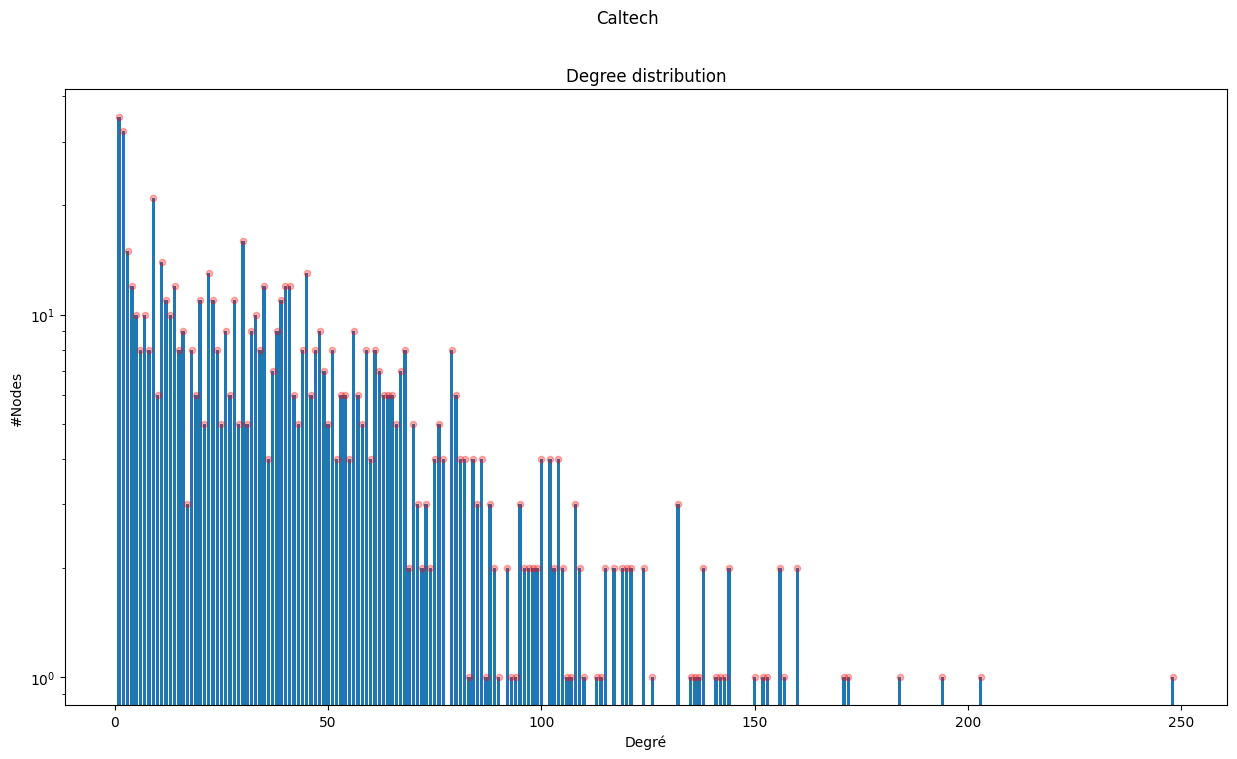

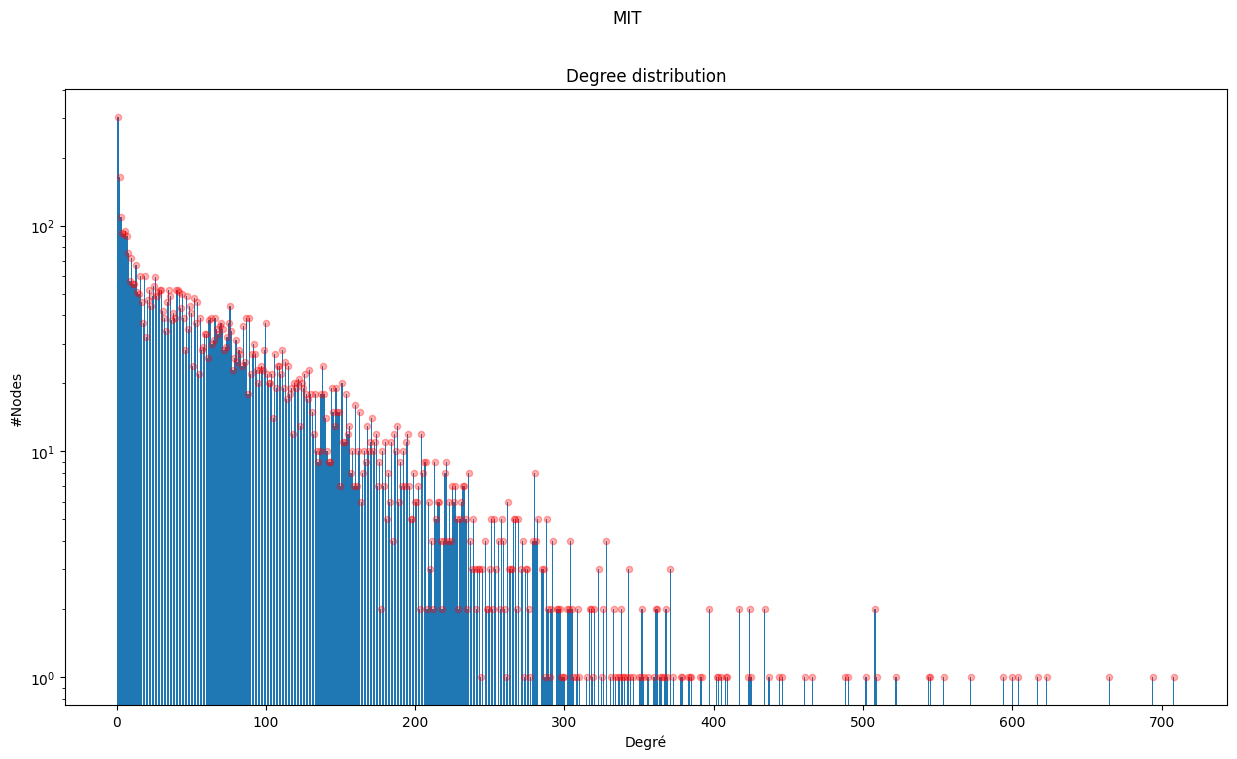

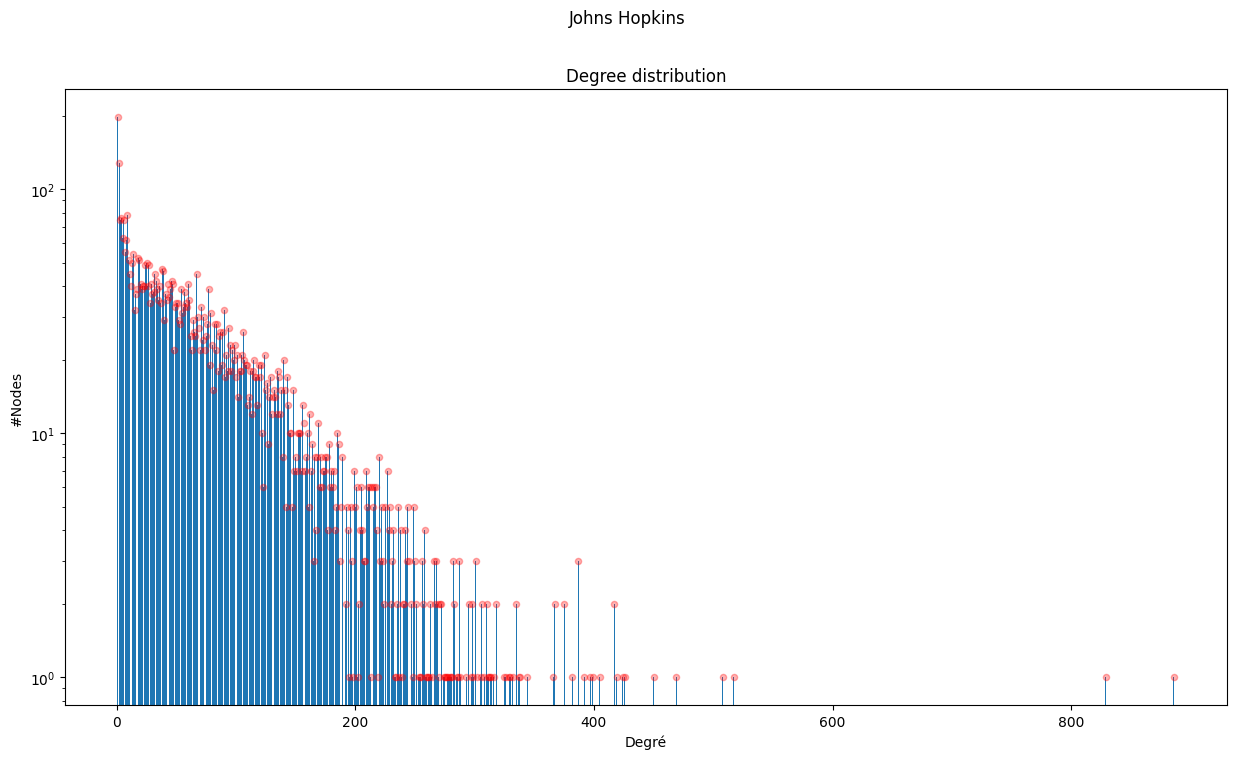

In [6]:
def degree_distribution(G):
    fig, (ax1) = plt.subplots(1)
    fig.suptitle(G.name)
    ax1.set_title("Degree distribution")
    ax1.set_xlabel("Degré")
    ax1.set_ylabel("#Nodes")
    ax1.set_yscale('log')

    D = sorted([d for n, d in G.degree()], reverse=True)
    degrees, counts = np.unique(D, return_counts=True)
    ax1.bar(degrees, counts)
    ax1.scatter(degrees, counts, marker='o', s=20, c='red', alpha=0.3)


degree_distribution(G1)
degree_distribution(G2)
degree_distribution(G3)

Clustering :

In [7]:
def global_clustering_coef(G: nx.Graph):
    return nx.algorithms.cluster.transitivity(G)

def local_average_clustering_coef(G):
    return nx.algorithms.cluster.average_clustering(G)

def density(G):
    return nx.density(G)

print("Global Clustering Coef")
print(f"{G1.name:13} :", global_clustering_coef(G1))
print(f"{G2.name:13} :", global_clustering_coef(G2))
print(f"{G3.name:13} :", global_clustering_coef(G3))
print("="*50)
print("Local Clustering Coef")
print(f"{G1.name:13} :", local_average_clustering_coef(G1))
print(f"{G2.name:13} :", local_average_clustering_coef(G2))
print(f"{G3.name:13} :", local_average_clustering_coef(G3))
print("="*50)
print("Density")
print(f"{G1.name:13} :", density(G1))
print(f"{G2.name:13} :", density(G2))
print(f"{G3.name:13} :", density(G3))

Global Clustering Coef
Caltech       : 0.2912826901150874
MIT           : 0.18028845093502427
Johns Hopkins : 0.19316123901594015
Local Clustering Coef
Caltech       : 0.40929439048517247
MIT           : 0.2712187419501315
Johns Hopkins : 0.26839307371293525
Density
Caltech       : 0.05640442132639792
MIT           : 0.012118119495041378
Johns Hopkins : 0.013910200162372396


Le clustering vs le degré

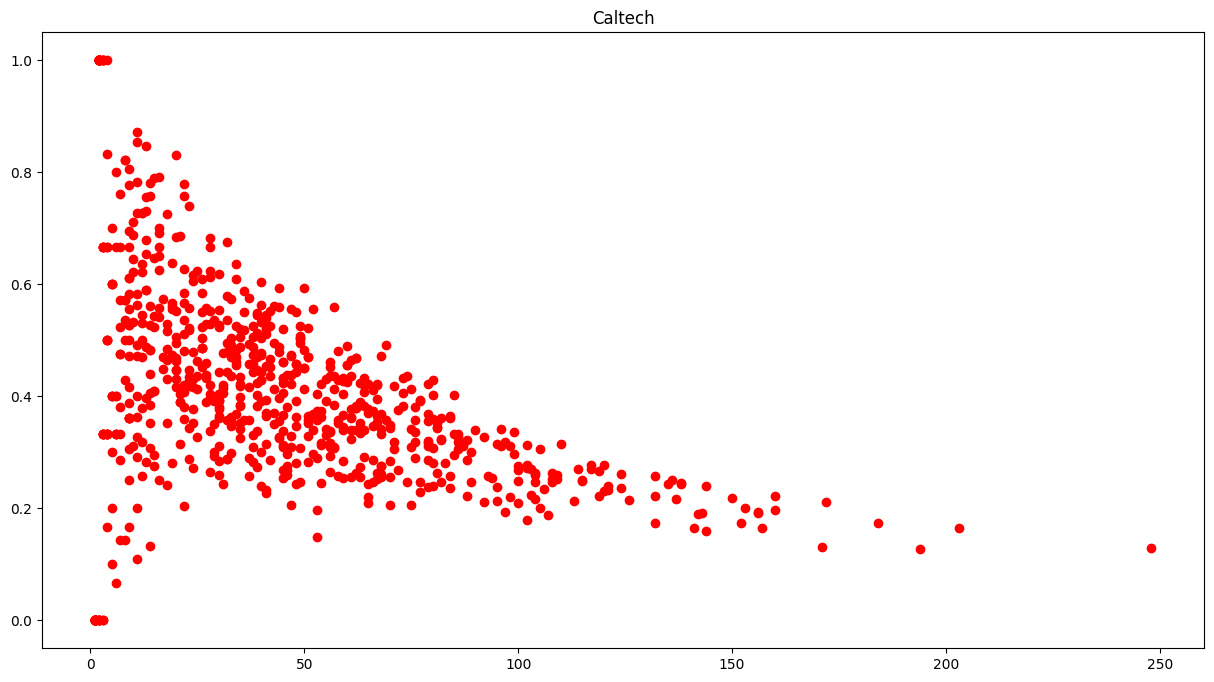

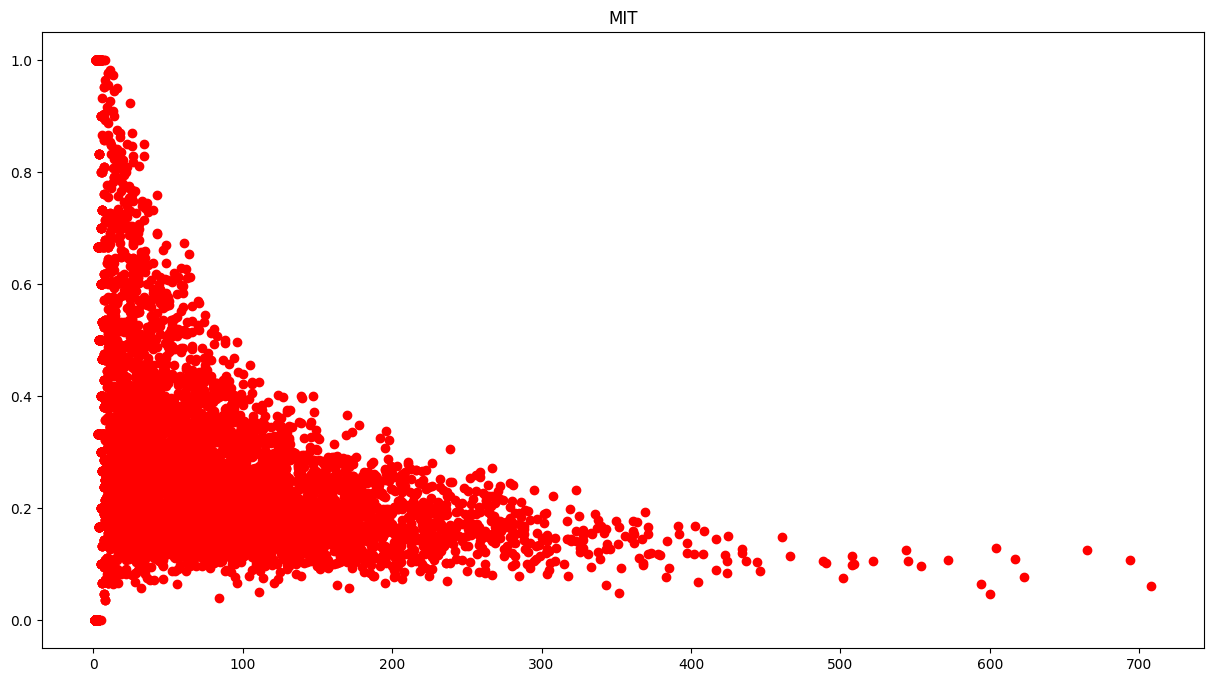

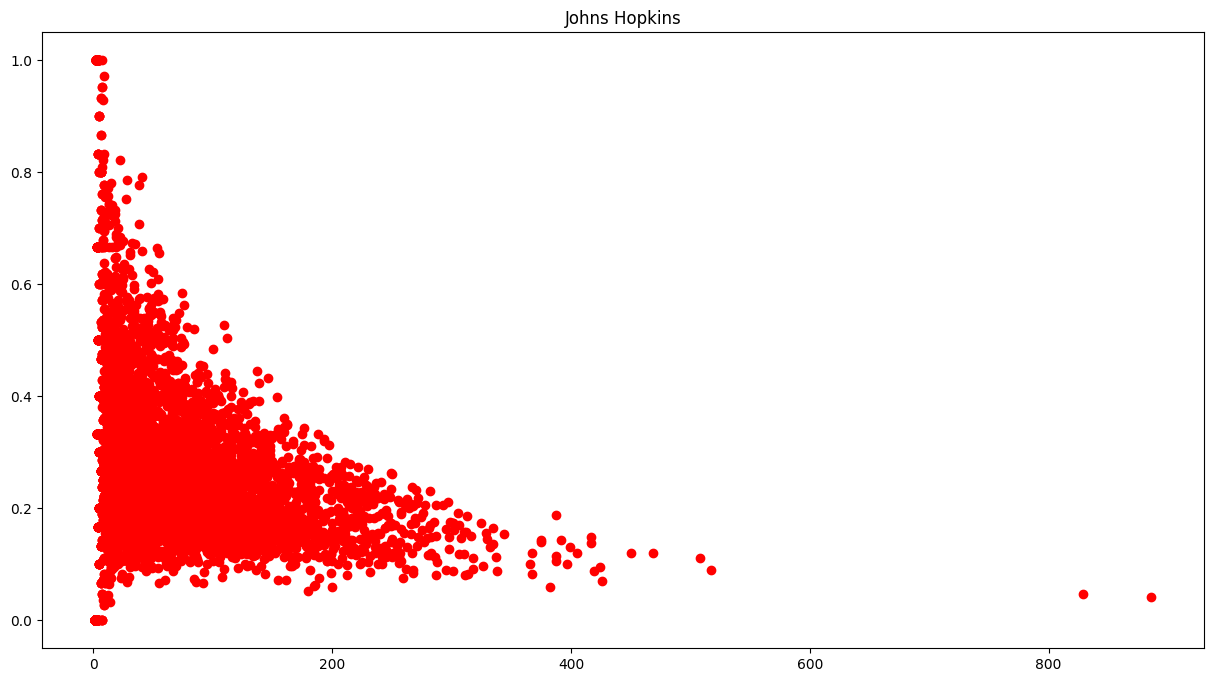

In [10]:
def degree_vs_local_cluster(G):
    plt.figure()
    plt.title(G.name)
    degrees = D = np.array([d for n, d in G.degree()])
    clusters = np.array(list(nx.algorithms.cluster.clustering(G).values()))
    plt.scatter(degrees, clusters, c='r')

degree_vs_local_cluster(G1)
degree_vs_local_cluster(G2)
degree_vs_local_cluster(G3)

Question 3

American75.gml
Amherst41.gml
Auburn71.gml
Baylor93.gml
BC17.gml
Berkeley13.gml
Bingham82.gml
Bowdoin47.gml
Brandeis99.gml
Brown11.gml
BU10.gml
Bucknell39.gml
Cal65.gml
Caltech36.gml
Carnegie49.gml


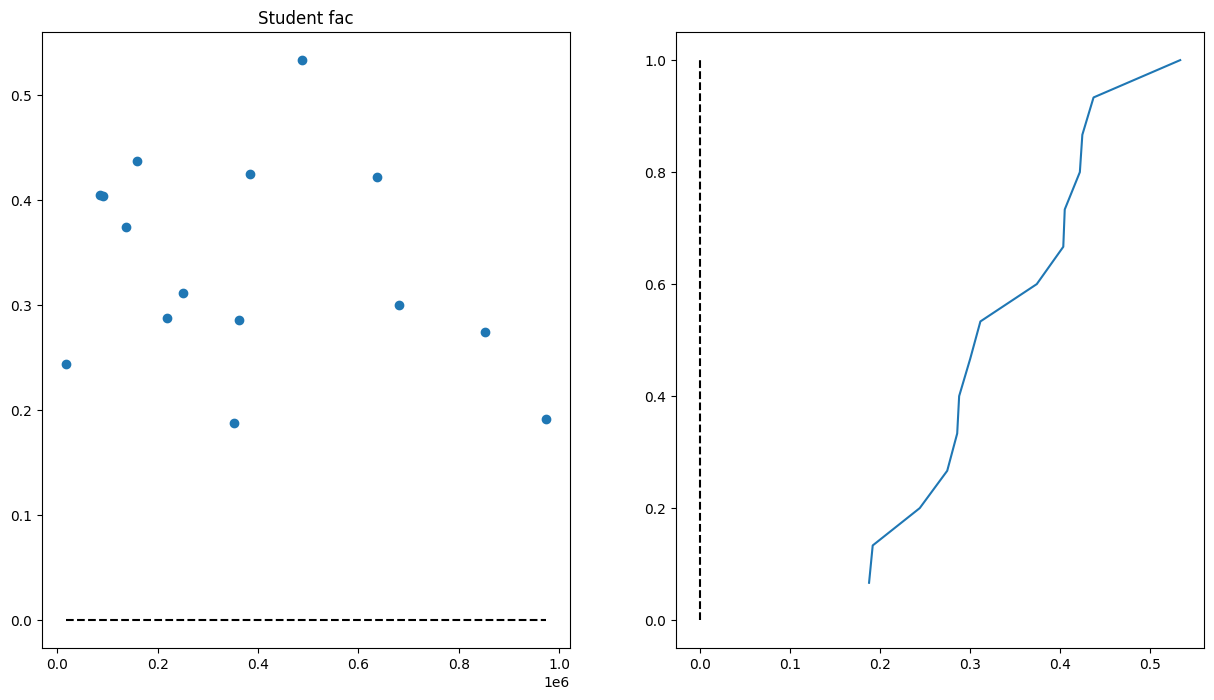

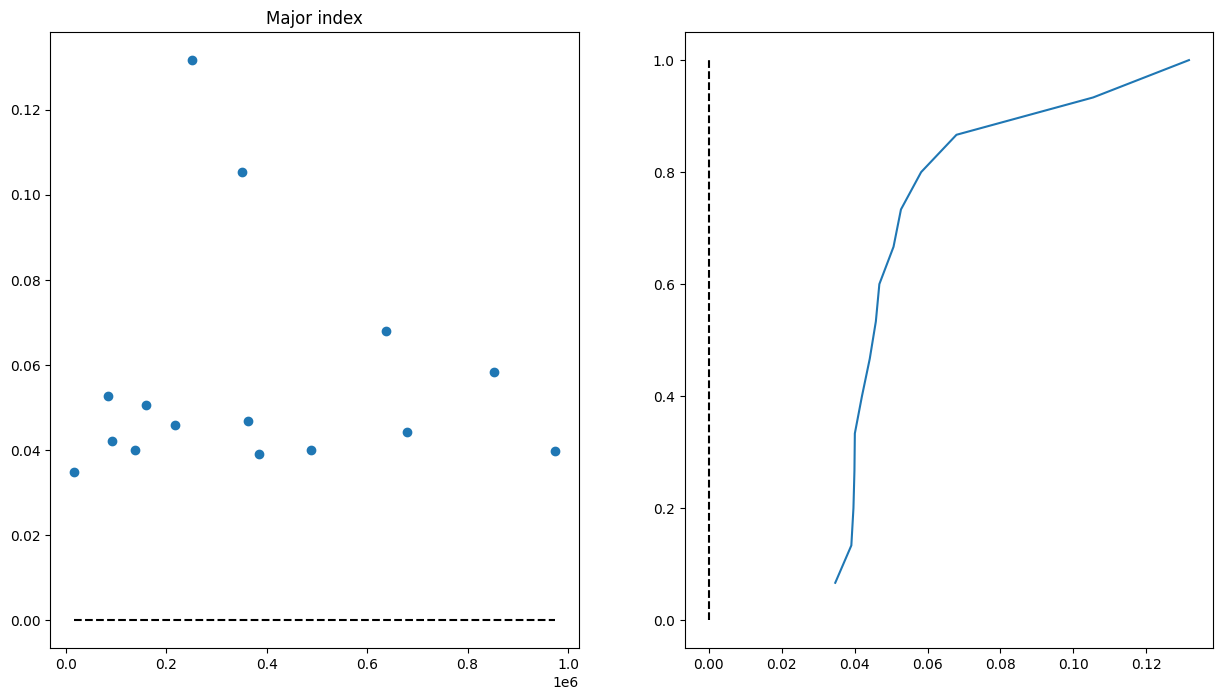

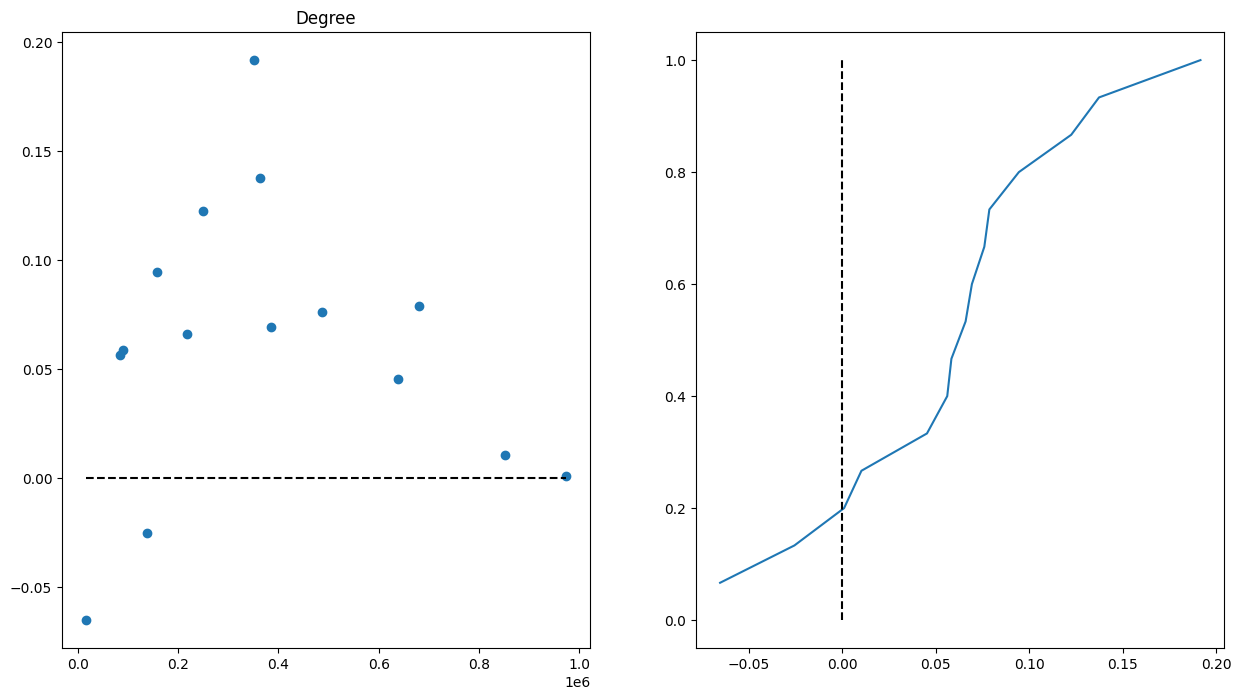

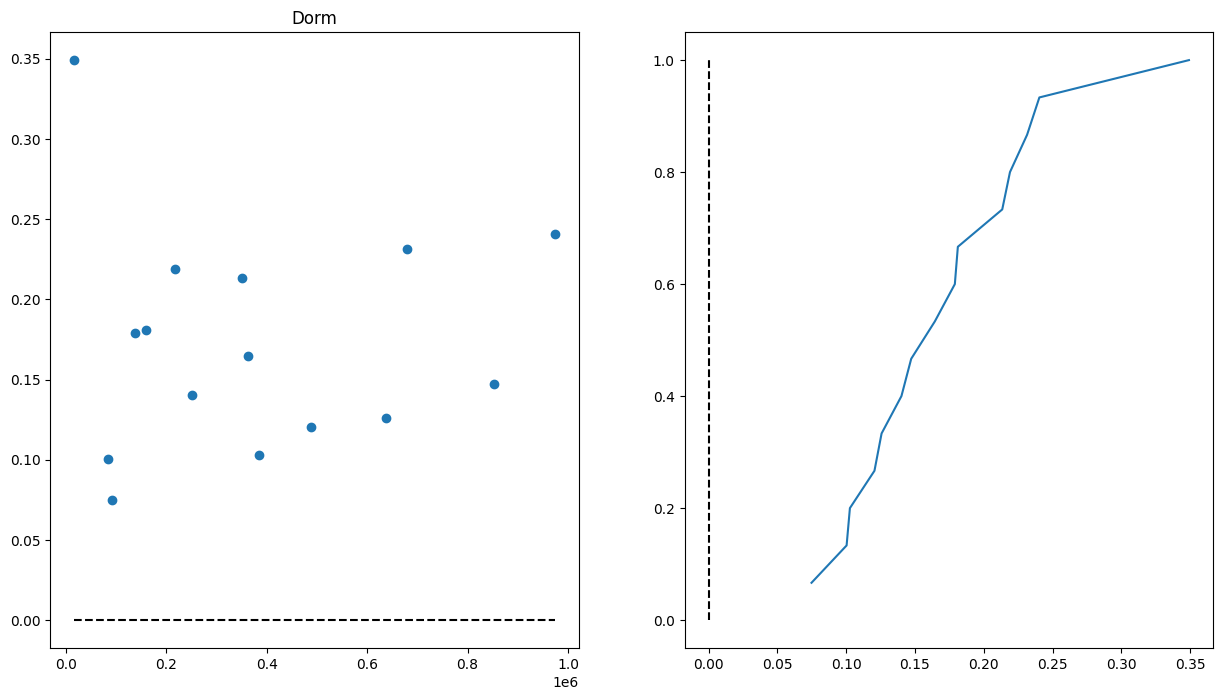

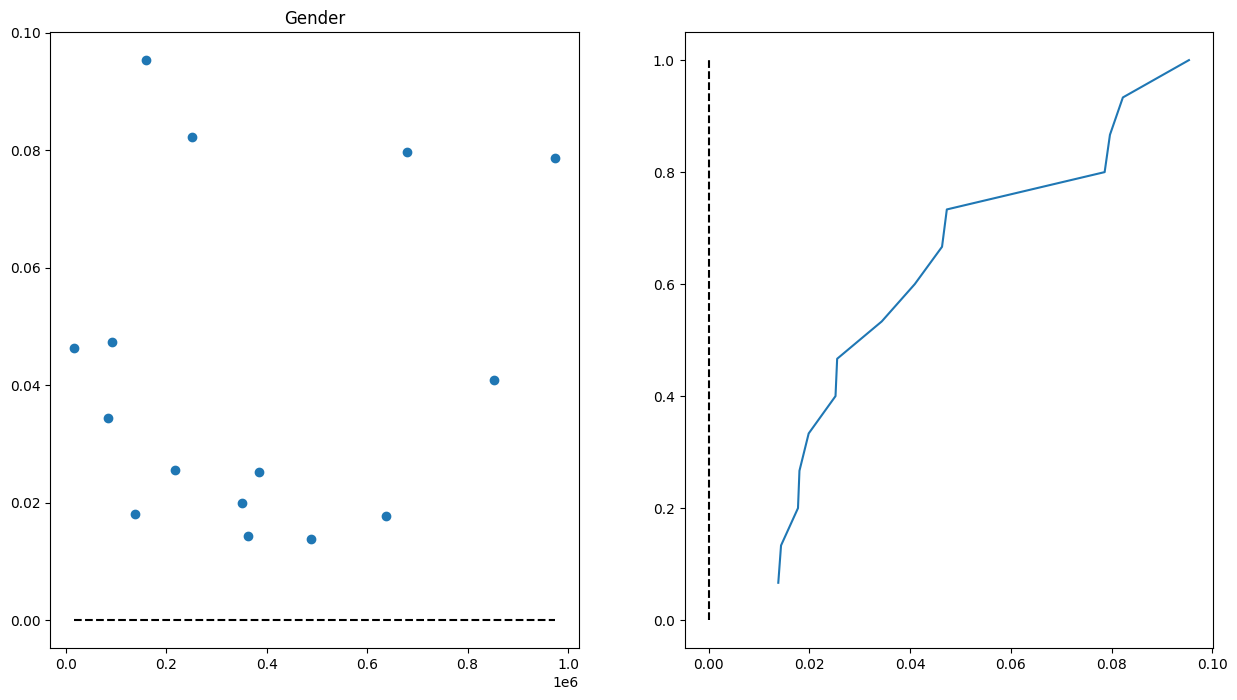

In [23]:

def assortativities(G: nx.Graph):
    return (nx.assortativity.attribute_assortativity_coefficient(G, "student_fac"),
        nx.assortativity.attribute_assortativity_coefficient(G, "major_index"),
        nx.assortativity.degree_assortativity_coefficient(G),
        nx.assortativity.attribute_assortativity_coefficient(G, "dorm"),
        nx.assortativity.attribute_assortativity_coefficient(G, "gender"))


def plot_assor(sizes, assor, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title(title)
    ax1.scatter(sizes, assor)
    ax1.plot([min(sizes), max(sizes)], [0, 0], color="black", linestyle="dashed")
    a, counts = np.unique(assor, return_counts=True)
    c_sum = np.cumsum(counts)/np.sum(counts)
    ax2.plot(a, c_sum)
    ax2.plot([0, 0], [0, np.max(c_sum)], color="black", linestyle="dashed")

def show_assor():
    sizes = []
    assor = [[], [], [], [], []]
    list_files = listdir("fb100")
    for filename in list_files[0:15]:
        print(filename)
        graph = nx.read_gml(f"fb100/{filename}")
        graph: nx.Graph = graph
        sizes.append(graph.size())
        for i, a in enumerate(assortativities(graph)):
            assor[i].append(a)
    plot_assor(sizes, assor[0], "Student fac")
    plot_assor(sizes, assor[1], "Major index")
    plot_assor(sizes, assor[2], "Degree")
    plot_assor(sizes, assor[3], "Dorm")
    plot_assor(sizes, assor[4], "Gender")

show_assor()

Question 4

In [8]:
from abc import ABC, abstractmethod 

class LinkPrediction(ABC):
    def __init__(self, graph):
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v): 
        neighbors_list = self.graph.neighbors(v)
        return list(neighbors_list)

    @abstractmethod 
    def fit(self):
        raise NotImplementedError("Fit must be implemented")

In [9]:
class CommonNeighbor(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbor, self).__init__(graph)
    
    def fit(self):
        common_neighbors = nx.algorithms.link_prediction.common_neighbor_centrality(self.graph, alpha=1)
        return common_neighbors


class JaccardNeighbor(LinkPrediction):
    def __init__(self, graph):
        super(JaccardNeighbor, self).__init__(graph)
    
    def fit(self):
        jaccard = nx.algorithms.link_prediction.jaccard_coefficient(self.graph)
        return jaccard


class AdamicAdarNeighbor(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdarNeighbor, self).__init__(graph)
    
    def fit(self):
        adamic_adar = nx.algorithms.link_prediction.adamic_adar_index(self.graph)
        return adamic_adar

In [10]:
import random

def remove_fractional_edges(G: nx.graph, fraction: float):
    nb_edges_to_remove = int(G.number_of_edges()*fraction)
    removed_edges = []
    
    G_result = G.copy()
    for i in range(nb_edges_to_remove):
        edges = list(G_result.edges)
        chosen_edge = random.choice(edges)
        removed_edges.append(chosen_edge)
        G_result.remove_edge(chosen_edge[0], chosen_edge[1])
    
    return G_result, removed_edges

In [11]:
def card_intersection_edges_list(l1, l2):
    l1 = [(u, v) for u, v in l1]
    l2 = [(u, v) for u, v, _ in l2]

    return len(set(l1)&set(l2))

In [12]:
def evaluate_link_predictor(G: nx.graph, n: int):
    for f in [0.05, 0.1, 0.15, 0.2]:
        G_altered, e_r = remove_fractional_edges(G, f)


        j = JaccardNeighbor(G_altered)
        j_sorted = list(j.fit())
        assert len(j_sorted) > n
        j_sorted.sort(key=lambda y: y[2])
        j_sorted = j_sorted[len(j_sorted)-1-n:len(j_sorted)-1]

        print(f"Fraction {f} | Nb of Jaccard right predictions : {card_intersection_edges_list(e_r, j_sorted)}")

        a = AdamicAdarNeighbor(G_altered)
        a_sorted = list(a.fit())
        assert len(a_sorted) > n
        a_sorted.sort(key=lambda y: y[2])
        a_sorted = a_sorted[len(a_sorted)-1-n:len(a_sorted)-1]

        print(f"Fraction {f} | Nb of Adamic/Adar right predictions : {card_intersection_edges_list(e_r, a_sorted)}")

In [46]:
evaluate_link_predictor(G1, 20)

Fraction 0.05 | Nb of Jaccard right predictions : 1
Fraction 0.05 | Nb of Adamic/Adar right predictions : 4
Fraction 0.1 | Nb of Jaccard right predictions : 1
Fraction 0.1 | Nb of Adamic/Adar right predictions : 10
Fraction 0.15 | Nb of Jaccard right predictions : 1
Fraction 0.15 | Nb of Adamic/Adar right predictions : 7
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\celin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\celin\AppData\Local\Temp\ipykernel_15884\628798029.py", line 1, in <module>
    evaluate_link_predictor(G1, 20)
  File "C:\Users\celin\AppData\Local\Temp\ipykernel_15884\3273905766.py", line 3, in evaluate_link_predictor
    G_altered, e_r = remove_fractional_edges(G, f)
  File "C:\Users\celin\AppData\Local\Temp\ipykernel_15884\2715512498.py", line 9, in remove_fractional_edges
    edges = list(G_result.edges)
  File "C:\Users\celin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\networkx\classes\reportviews.py", line -1, in __iter__
KeyboardInterrupt

During handling of the above exception, another except

Question 5

In [13]:
def fisher_yates(arr):
    from random import randint
    if len(arr) == 0:
        return 
    
    for i in range(len(arr) - 1):
        j = randint(i, len(arr) - 1)
        arr[j], arr[i] = arr[i], arr[j]

In [15]:
def wipeout_attribute_partially(G, fraction, attribute):
    g_to_change = G.copy()
    nb_nodes_to_change = int(g_to_change.number_of_nodes() * fraction)
    changed_nodes = []
    for i in range(nb_nodes_to_change):
        nodes = [j for j in g_to_change.nodes(data=True) if j[1][attribute] != -1]
        chosen_node = random.choice(nodes)
        changed_nodes.append((chosen_node[0], chosen_node[1].copy()))
        chosen_node[1][attribute] = -1
        nx.set_node_attributes(g_to_change, {chosen_node[0]: -1}, attribute)
    
    return g_to_change, changed_nodes

In [16]:
def lpa(G, attribute, max_iter=100):
    from random import choice
    from collections import Counter
    N = len(G)
    labels = {n : i for n, i in nx.classes.function.get_node_attributes(G, attribute).items()}
    cont = True
    n_iter = 0
    
    while cont and n_iter < max_iter :
        nodes = list(G.nodes())
        cont = False
        fisher_yates(nodes)
        n_iter += 1
        
        for v in nodes :
            
            if not list(G.neighbors(v)):
                continue
            
            label_freq = Counter()
            for u in G.neighbors(v):
                label_freq.update({labels[u]: 1})

            max_freq = max(label_freq.values())
            
            best_labels = []
            for label, freq in label_freq.items():
                if freq == max_freq:
                    best_labels.append(label)
                    
            if labels[v] not in best_labels:
                c = choice(best_labels)
                if c != -1:
                    labels[v] = c
                    nx.set_node_attributes(G, {v: labels[v]}, attribute)
                cont = True
    return labels


In [17]:
def compute_accuracy_score_lpa(G, attribute, nmax):
    fractions = [0.1, 0.2, 0.3]
    for f in fractions :
        G_altered, altered_nodes = wipeout_attribute_partially(G, f, attribute)
        labels = lpa(G_altered, attribute, nmax)
        score = 0
        for i in altered_nodes:
            if G_altered.nodes(data=True)[i[0]][attribute] == i[1][attribute]:
                score += 1
        score = score/len(altered_nodes)
        print(f"{attribute} | Accuracy : {score} ({f*100}% removed labels) ")

In [18]:
def compute_accuracy_score_lpa_all_attributes(G: nx.graph, attributes: str, nmax: int):
    for attr in attributes:
        compute_accuracy_score_lpa(G, attr, nmax)

In [19]:
print("Caltech :")
compute_accuracy_score_lpa_all_attributes(G1, ["dorm", "major_index", "year", "gender"], 100)

Caltech :
dorm | Accuracy : 0.7631578947368421 (10.0% removed labels) 
dorm | Accuracy : 0.11764705882352941 (20.0% removed labels) 
dorm | Accuracy : 0.6304347826086957 (30.0% removed labels) 
major_index | Accuracy : 0.11842105263157894 (10.0% removed labels) 
major_index | Accuracy : 0.11764705882352941 (20.0% removed labels) 
major_index | Accuracy : 0.08695652173913043 (30.0% removed labels) 
year | Accuracy : 0.23684210526315788 (10.0% removed labels) 
year | Accuracy : 0.24836601307189543 (20.0% removed labels) 
year | Accuracy : 0.21739130434782608 (30.0% removed labels) 
gender | Accuracy : 0.5263157894736842 (10.0% removed labels) 
gender | Accuracy : 0.5947712418300654 (20.0% removed labels) 
gender | Accuracy : 0.6173913043478261 (30.0% removed labels) 
